In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 0 Aided by Github Copilot

# 1 Suppose we have 5 completely independent classifiers
and you have an accuracy of 70% for each. Assuming that the
errors are uncorrelated, calculate the probability that the ensemble makes a correct
prediction. (hint: Assume that each classifier prediction follows a binomial distribu-
tion).

This is just $P(X \geq 3)$ where $X$ is the number of correct predictions. We can calculate this using the binomial distribution.

So $P(X = 3) + P(X = 4) + P(X = 5)$

In [109]:
from math import comb

n = 5  # number of classifiers
p = 0.7  # accuracy of each classifier

P_X_3 = comb(n, 3) * (p**3) * ((1-p)**(n-3))
P_X_4 = comb(n, 4) * (p**4) * ((1-p)**(n-4))
P_X_5 = comb(n, 5) * (p**5) * ((1-p)**(n-5))

correct = P_X_3 + P_X_4 + P_X_5
print(correct)

0.8369199999999999


# 2 Assume now that errors are partially correlated
What alternative distributions
can be used to calculate the probability that the ensemble makes a correct prediction?

Multinomial distribution

# 3 How does Unstable procedure of trees affect accuracy in ensembles

# 4 Outcome using CART for bagging?

# 5 What is a ROC Curve?
How does the concept of goodness of fit relate to ROC curve?

# 6 What is a learning curve

# 7 Use the bagging approach in order to analyze the scenarios 1 and 2
What test error rate do you obtain? Determine which variables are most
important

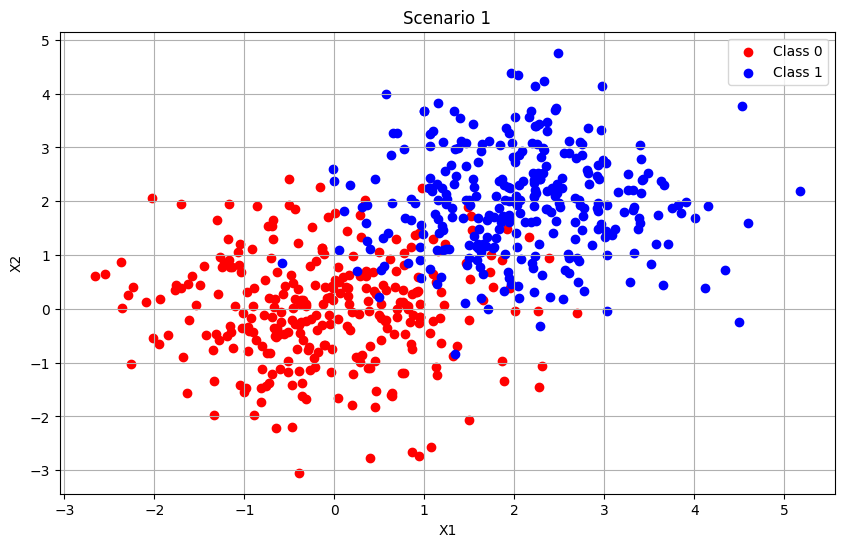

In [110]:
# scenario one
# Scenario 1
np.random.seed(0)
n = 300
mean = [0, 0]
cov = [[1, 0], [0, 1]]
X1 = np.random.multivariate_normal(mean, cov, n)
y1 = np.zeros(n)

mean = [2, 2]
cov = [[1, 0], [0, 1]]
X2 = np.random.multivariate_normal(mean, cov, n)
y2 = np.ones(n)

X_s1 = np.concatenate((X1, X2))
y_s1 = np.concatenate((y1, y2))

plt.figure(figsize=(10, 6))
plt.scatter(X1[:, 0], X1[:, 1], color="r", label="Class 0")
plt.scatter(X2[:, 0], X2[:, 1], color="b", label="Class 1")
plt.title("Scenario 1")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()

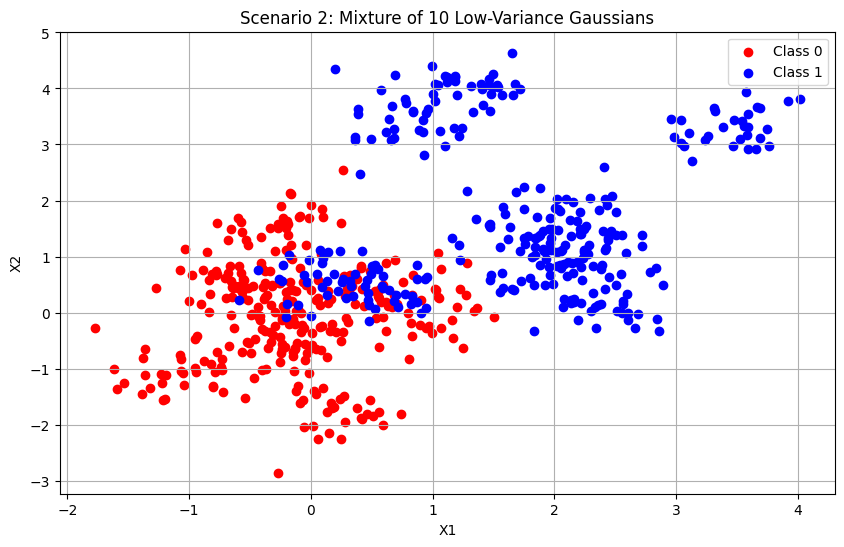

In [111]:
# Scenario 2: Mixture of 10 low-variance Gaussians
np.random.seed(15)
n = 300 
n_gaussians = 10 
low_variance = [[0.1, 0], [0, 0.1]]  # low variance

# distribution of means
meta_mean_class_1 = [0, 0]
meta_cov_class_1 = [[1, 0], [0, 1]]
meta_mean_class_2 = [2, 2]
meta_cov_class_2 = [[1, 0], [0, 1]]

# Generate means for the Gaussian components
means_class_1 = np.random.multivariate_normal(meta_mean_class_1, meta_cov_class_1, n_gaussians)
means_class_2 = np.random.multivariate_normal(meta_mean_class_2, meta_cov_class_2, n_gaussians)

# Generate data for each mixture component
X1 = np.vstack([np.random.multivariate_normal(mean, low_variance, n // n_gaussians) for mean in means_class_1])
X2 = np.vstack([np.random.multivariate_normal(mean, low_variance, n // n_gaussians) for mean in means_class_2])

y1 = np.zeros(X1.shape[0])
y2 = np.ones(X2.shape[0])

X_s2 = np.concatenate((X1, X2))
y_s2 = np.concatenate((y1, y2))

# Plotting the generated data
plt.figure(figsize=(10, 6))
plt.scatter(X1[:, 0], X1[:, 1], color="red", label="Class 0")
plt.scatter(X2[:, 0], X2[:, 1], color="blue", label="Class 1")
plt.title("Scenario 2: Mixture of 10 Low-Variance Gaussians")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()

In [112]:
from sklearn.ensemble import BaggingClassifier

# train test split
from sklearn.model_selection import train_test_split

X_train_s1, X_test_s1, y_train_s1, y_test_s1 = train_test_split(X_s1, y_s1, test_size=0.3, random_state=0)
X_train_s2, X_test_s2, y_train_s2, y_test_s2 = train_test_split(X_s2, y_s2, test_size=0.3, random_state=0)

# SCenario 1
bagging = BaggingClassifier(random_state=0)
bagging.fit(X_train_s1, y_train_s1)

print(f"Scenario 1: Bagging Test Error Rate: {1 - bagging.score(X_test_s1, y_test_s1)}")

# Scenario 2
bagging_2 = BaggingClassifier(random_state=0)
bagging_2.fit(X_train_s2, y_train_s2)

print(f"Scenario 2: Bagging Test Error Rate: {1 - bagging_2.score(X_test_s2, y_test_s2)}")


Scenario 1: Bagging Test Error Rate: 0.10555555555555551
Scenario 2: Bagging Test Error Rate: 0.09444444444444444


# 8 Compare the ROC curve and learning curves of the bagging approach vs a tree

In [113]:
from sklearn.tree import DecisionTreeClassifier

# Scenario 1
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train_s1, y_train_s1)

# Scenario 2
tree_2 = DecisionTreeClassifier(random_state=0)
tree_2.fit(X_train_s2, y_train_s2)

from sklearn.metrics import roc_curve, roc_auc_score

# Scenario 1
y_pred_proba_s1 = bagging.predict_proba(X_test_s1)[:, 1]
fpr_s1, tpr_s1, _ = roc_curve(y_test_s1, y_pred_proba_s1)
roc_auc_s1 = roc_auc_score(y_test_s1, y_pred_proba_s1)

# Scenario 2
y_pred_proba_s2 = bagging_2.predict_proba(X_test_s2)[:, 1]
fpr_s2, tpr_s2, _ = roc_curve(y_test_s2, y_pred_proba_s2)
roc_auc_s2 = roc_auc_score(y_test_s2, y_pred_proba_s2)

# same for tree
y_pred_proba_s1_tree = tree.predict_proba(X_test_s1)[:, 1]
fpr_s1_tree, tpr_s1_tree, _ = roc_curve(y_test_s1, y_pred_proba_s1_tree)
roc_auc_s1_tree = roc_auc_score(y_test_s1, y_pred_proba_s1_tree)

# Scenario 2 tree
y_pred_proba_s2_tree = tree_2.predict_proba(X_test_s2)[:, 1]
fpr_s2_tree, tpr_s2_tree, _ = roc_curve(y_test_s2, y_pred_proba_s2_tree)
roc_auc_s2_tree = roc_auc_score(y_test_s2, y_pred_proba_s2_tree)

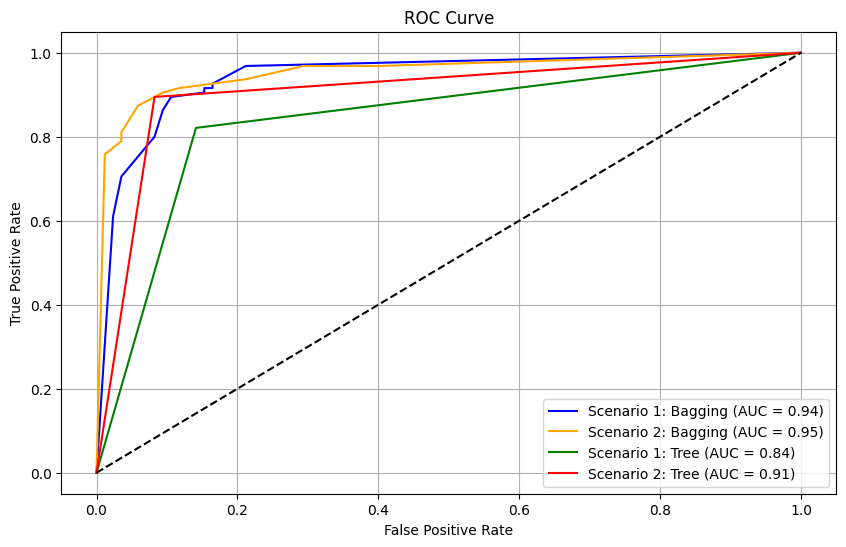

In [114]:
# Plotting the ROC curve for bagging and tree
plt.figure(figsize=(10, 6))
plt.plot(fpr_s1, tpr_s1, color="blue", label=f"Scenario 1: Bagging (AUC = {roc_auc_s1:.2f})")
plt.plot(fpr_s2, tpr_s2, color="orange", label=f"Scenario 2: Bagging (AUC = {roc_auc_s2:.2f})")
plt.plot(fpr_s1_tree, tpr_s1_tree, color="green", label=f"Scenario 1: Tree (AUC = {roc_auc_s1_tree:.2f})")
plt.plot(fpr_s2_tree, tpr_s2_tree, color="red", label=f"Scenario 2: Tree (AUC = {roc_auc_s2_tree:.2f})")
plt.plot([0, 1], [0, 1], color="black", linestyle="--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

In [115]:
from sklearn.model_selection import learning_curve

# Scenario 1
train_sizes, train_scores, test_scores = learning_curve(bagging, X_s1, y_s1, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Scenario 2
train_sizes_2, train_scores_2, test_scores_2 = learning_curve(bagging_2, X_s2, y_s2, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# same for tree
train_sizes_tree, train_scores_tree, test_scores_tree = learning_curve(tree, X_s1, y_s1, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Scenario 2 tree
train_sizes_2_tree, train_scores_2_tree, test_scores_2_tree = learning_curve(tree_2, X_s2, y_s2, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

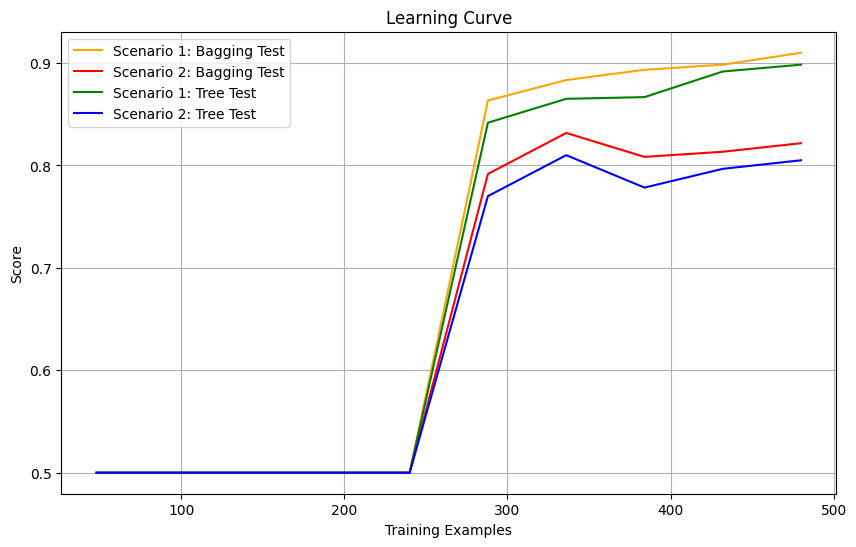

In [116]:

# Plotting the learning curve for bagging and tree
plt.figure(figsize=(10, 6))

plt.plot(train_sizes, np.mean(test_scores, axis=1), color="orange", label="Scenario 1: Bagging Test")
plt.plot(train_sizes_2, np.mean(test_scores_2, axis=1), color="red", label="Scenario 2: Bagging Test")

plt.plot(train_sizes_tree, np.mean(test_scores_tree, axis=1), color="green", label="Scenario 1: Tree Test")
plt.plot(train_sizes_2_tree, np.mean(test_scores_2_tree, axis=1), color="blue", label="Scenario 2: Tree Test")
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()


# 9 What are the hyperparameters of bagging?
Main hyperparams are: n_estimators, max_samples, max_features (random forest esque)
Main hyperparam to tune is n_estimators...

Now: Use cross-validation in
order to determine the optimal level of tree complexity for scenarios 1 and 2 from
ESLII. Compare the confusion matrix and training error rates between the your first
approach and the optimal level you found for both training and test dataset.

In [117]:
# train bagging classifiers with cross validation for n_estimators in range 10 to 500 in steps of 10
from sklearn.model_selection import cross_val_score

n_estimators = np.arange(1, 151, 10)
cv_scores_s1 = []
cv_scores_s2 = []

for n in n_estimators:
    bagging = BaggingClassifier(n_estimators=n, random_state=0)
    bagging2 = BaggingClassifier(n_estimators=n, random_state=1)
    
    scores_s1 = cross_val_score(bagging, X_s1, y_s1, cv=5)
    cv_scores_s1.append((n, scores_s1.mean(), scores_s1.std()))
    
    scores_s2 = cross_val_score(bagging2, X_s2, y_s2, cv=5)
    cv_scores_s2.append((n, scores_s2.mean(), scores_s2.std()))
    
# plot the cross validation scores
cv_scores_s1 = np.array(cv_scores_s1)
cv_scores_s2 = np.array(cv_scores_s2)

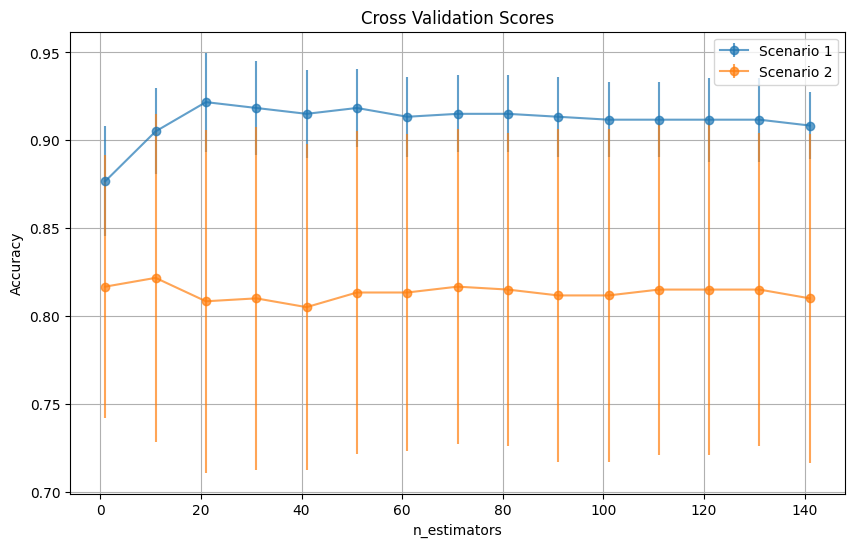

In [118]:

plt.figure(figsize=(10, 6))
plt.errorbar(cv_scores_s1[:, 0], cv_scores_s1[:, 1], yerr=cv_scores_s1[:, 2], label="Scenario 1", fmt="o-", alpha=0.7)
plt.errorbar(cv_scores_s2[:, 0], cv_scores_s2[:, 1], yerr=cv_scores_s2[:, 2], label="Scenario 2", fmt="o-", alpha=0.7)
plt.title("Cross Validation Scores")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [120]:
# for scenario 1, n_estimators = 21. For scenario 2, n_estimators = 11
# compare confusion matrix and training error rates
from sklearn.metrics import confusion_matrix

# Scenario 1
bagging_s1 = BaggingClassifier(n_estimators=21, random_state=0)
bagging_s1.fit(X_train_s1, y_train_s1)
bagging_s1_unbounded = BaggingClassifier(random_state=0)
bagging_s1_unbounded.fit(X_train_s1, y_train_s1)

# Scenario 2
bagging_s2 = BaggingClassifier(n_estimators=11, random_state=0)
bagging_s2.fit(X_train_s2, y_train_s2)
bagging_s2_unbounded = BaggingClassifier(random_state=0)
bagging_s2_unbounded.fit(X_train_s2, y_train_s2)

# Scenario 1
y_pred_s1 = bagging_s1.predict(X_test_s1)
y_pred_s1_unbounded = bagging_s1_unbounded.predict(X_test_s1)

# Scenario 2
y_pred_s2 = bagging_s2.predict(X_test_s2)
y_pred_s2_unbounded = bagging_s2_unbounded.predict(X_test_s2)

# confusion matrix
cm_s1 = confusion_matrix(y_test_s1, y_pred_s1)
cm_s1_unbounded = confusion_matrix(y_test_s1, y_pred_s1_unbounded)

cm_s2 = confusion_matrix(y_test_s2, y_pred_s2)
cm_s2_unbounded = confusion_matrix(y_test_s2, y_pred_s2_unbounded)

print("Scenario 1: Confusion Matrix")
print(cm_s1)
print(cm_s1_unbounded)
print("Scenario 2: Confusion Matrix")
print(cm_s2)
print(cm_s2_unbounded)

# training error rates
train_error_s1 = 1 - bagging_s1.score(X_train_s1, y_train_s1)
train_error_s1_unbounded = 1 - bagging_s1_unbounded.score(X_train_s1, y_train_s1)

train_error_s2 = 1 - bagging_s2.score(X_train_s2, y_train_s2)
train_error_s2_unbounded = 1 - bagging_s2_unbounded.score(X_train_s2, y_train_s2)

print(f"Scenario 1: Training Error Rate: {train_error_s1}")
print(f"Scenario 1: Training Error Rate (Unbounded): {train_error_s1_unbounded}")
print(f"Scenario 2: Training Error Rate: {train_error_s2}")
print(f"Scenario 2: Training Error Rate (Unbounded): {train_error_s2_unbounded}")



Scenario 1: Confusion Matrix
[[74 11]
 [ 9 86]]
[[76  9]
 [10 85]]
Scenario 2: Confusion Matrix
[[78  7]
 [ 9 86]]
[[80  5]
 [12 83]]
Scenario 1: Training Error Rate: 0.00952380952380949
Scenario 1: Training Error Rate (Unbounded): 0.00952380952380949
Scenario 2: Training Error Rate: 0.01666666666666672
Scenario 2: Training Error Rate (Unbounded): 0.023809523809523836
